In [1]:
%matplotlib inline

In [2]:
from pandarus import *
import geopandas as gpd
import pandas as pd
import rasterio
from rasterio import plot as rp
import os
import json

In [3]:
grid_fp = os.path.join('..', 'tests', 'data', 'grid.geojson')
points_fp = os.path.join('..', 'tests', 'data', 'points.geojson')
square_fp = os.path.join('..', 'tests', 'data', 'square.geojson')
lines_fp = os.path.join('..', 'tests', 'data', 'lines.geojson')
range_fp = os.path.join('..', 'tests', 'data', 'range.tif')

In [4]:
grid = gpd.read_file(grid_fp)
square =  gpd.read_file(square_fp)
points = gpd.read_file(points_fp)
lines = gpd.read_file(lines_fp)

# Intersecting polygons

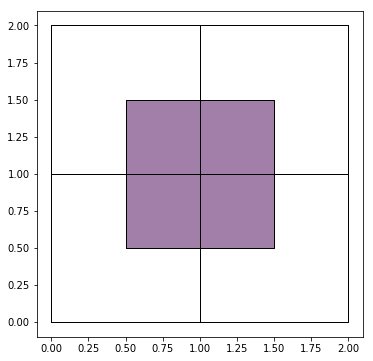

In [5]:
axes = grid.plot(color='white', figsize=(6, 6))
square.plot(ax=axes, alpha=0.5)

In [6]:
spatial_result, json_data = intersect(
    square_fp,
    'name',
    grid_fp,
    'name',
    compress=False
)
json.load(open(json_data))

{'data': [['single', 'grid cell 1', 3097248058.207055],
  ['single', 'grid cell 3', 3097248058.207057],
  ['single', 'grid cell 2', 3097719886.041353],
  ['single', 'grid cell 0', 3097719886.0413527]],
 'metadata': {'first': {'field': 'name',
   'filename': 'square.geojson',
   'path': '/Users/cmutel/Code/pandarus/tests/data/square.geojson',
   'sha256': '6c61f42f10bebd4ad5e94caa8658b2fa09a720666cfce7c91543e5c7dcd4ebb6'},
  'second': {'field': 'name',
   'filename': 'grid.geojson',
   'path': '/Users/cmutel/Code/pandarus/tests/data/grid.geojson',
   'sha256': '5f261833d583cf59067d2019bde4d024093e8755aa37ae3d966cc8f4e32da7a0'},
  'when': '2017-03-22T10:20:58.685147'}}

In [7]:
intersection = gpd.read_file(spatial_result)
intersection

,from_label,geometry,id,measure,to_label
0,single,"(POLYGON ((0.5 1, 0.5 1.5, 1 1.5, 1 1, 0.5 1)))",0,3.097248e+09,grid cell 1
1,single,"(POLYGON ((1 1.5, 1.5 1.5, 1.5 1, 1 1, 1 1.5)))",1,3.097248e+09,grid cell 3
2,single,"(POLYGON ((1.5 1, 1.5 0.5, 1 0.5, 1 1, 1.5 1)))",2,3.097720e+09,grid cell 2
3,single,"(POLYGON ((0.5 0.5, 0.5 1, 1 1, 1 0.5, 0.5 0.5)))",3,3.097720e+09,grid cell 0


0    Annotation(0.75,1.25,'0')
1    Annotation(1.25,1.25,'1')
2    Annotation(1.25,0.75,'2')
3    Annotation(0.75,0.75,'3')
dtype: object

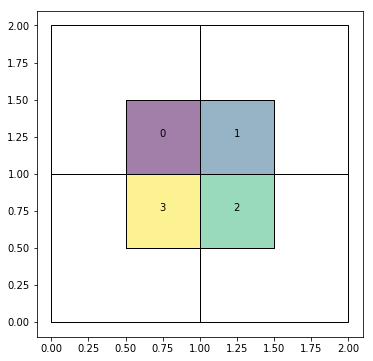

In [8]:
axes = grid.plot(color='white', figsize=(6, 6))
intersection.plot(ax=axes, alpha=0.5)
intersection.apply(
    lambda x: axes.annotate(s=x['id'], xy=x.geometry.representative_point().coords[0], ha='center'), 
    axis=1
)

# Intersecting lines

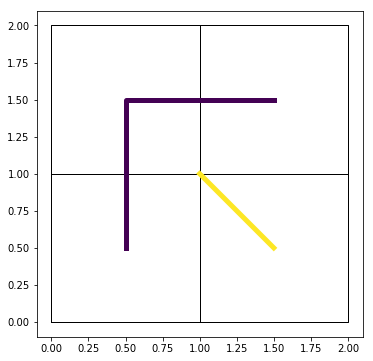

In [9]:
axes = grid.plot(color='white', figsize=(6, 6))
lines.plot(linewidth=5, ax=axes)

In [10]:
spatial_result, json_data = intersect(
    lines_fp, 
    'name',
    grid_fp,
    'name',
    compress=False
)
json.load(open(json_data))

{'data': [['B', 'grid cell 2', 79583.2457341753],
  ['A', 'grid cell 3', 50100.78363438923],
  ['A', 'grid cell 1', 111917.50475663005],
  ['A', 'grid cell 0', 61820.32883655653]],
 'metadata': {'first': {'field': 'name',
   'filename': 'lines.geojson',
   'path': '/Users/cmutel/Code/pandarus/tests/data/lines.geojson',
   'sha256': '919c92894521b82139d451a37ab4daecaa5a56b9ec9526a94a1dff0f1e200e5e'},
  'second': {'field': 'name',
   'filename': 'grid.geojson',
   'path': '/Users/cmutel/Code/pandarus/tests/data/grid.geojson',
   'sha256': '5f261833d583cf59067d2019bde4d024093e8755aa37ae3d966cc8f4e32da7a0'},
  'when': '2017-03-22T10:21:03.912170'}}

In [11]:
intersection = gpd.read_file(spatial_result)
intersection

,from_label,geometry,id,measure,to_label
0,B,"(LINESTRING (1 1, 1.5 0.5))",0,79583.245734,grid cell 2
1,A,"(LINESTRING (1 1.5, 1.5 1.5))",1,50100.783634,grid cell 3
2,A,"(LINESTRING (0.5 1, 0.5 1.5, 1 1.5))",2,111917.504757,grid cell 1
3,A,"(LINESTRING (0.5 0.5, 0.5 1))",3,61820.328837,grid cell 0


0        Annotation(1,1,'0')
1      Annotation(1,1.5,'1')
2    Annotation(0.5,1.5,'2')
3    Annotation(0.5,0.5,'3')
dtype: object

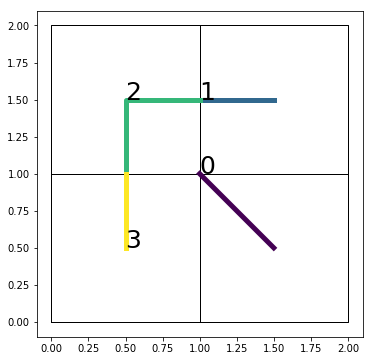

In [12]:
axes = grid.plot(color='white', figsize=(6, 6))
intersection.plot(linewidth=5, ax=axes)
intersection.apply(
    lambda x: axes.annotate(
        s=x['id'], 
        xy=x.geometry.representative_point().coords[0], 
        size=25), 
    axis=1
)

In [13]:
intersection

,from_label,geometry,id,measure,to_label
0,B,"(LINESTRING (1 1, 1.5 0.5))",0,79583.245734,grid cell 2
1,A,"(LINESTRING (1 1.5, 1.5 1.5))",1,50100.783634,grid cell 3
2,A,"(LINESTRING (0.5 1, 0.5 1.5, 1 1.5))",2,111917.504757,grid cell 1
3,A,"(LINESTRING (0.5 0.5, 0.5 1))",3,61820.328837,grid cell 0


# Intersecting points

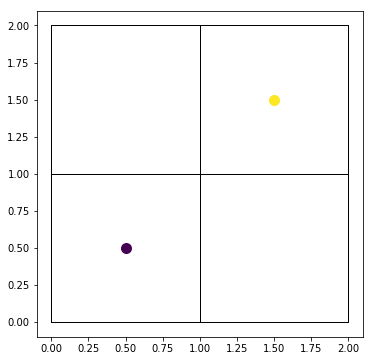

In [14]:
axes = grid.plot(color='white', figsize=(6, 6))
points.plot(markersize=10, ax=axes)

In [15]:
spatial_result, json_data = intersect(
    points_fp, 
    'name',
    grid_fp,
    'name',
    compress=False
)
json.load(open(json_data))

{'data': [['point 2', 'grid cell 3', 1.0], ['point 1', 'grid cell 0', 1.0]],
 'metadata': {'first': {'field': 'name',
   'filename': 'points.geojson',
   'path': '/Users/cmutel/Code/pandarus/tests/data/points.geojson',
   'sha256': '45028ae742de714be4dfb9a18308f6fe45397470553a2d203be4ca0ce45b232b'},
  'second': {'field': 'name',
   'filename': 'grid.geojson',
   'path': '/Users/cmutel/Code/pandarus/tests/data/grid.geojson',
   'sha256': '5f261833d583cf59067d2019bde4d024093e8755aa37ae3d966cc8f4e32da7a0'},
  'when': '2017-03-22T10:21:10.527163'}}

In [16]:
intersection = gpd.read_file(spatial_result)
intersection

,from_label,geometry,id,measure,to_label
0,point 2,(POINT (1.5 1.5)),0,1.0,grid cell 3
1,point 1,(POINT (0.5 0.5)),1,1.0,grid cell 0


# Getting raster statistics for polygons

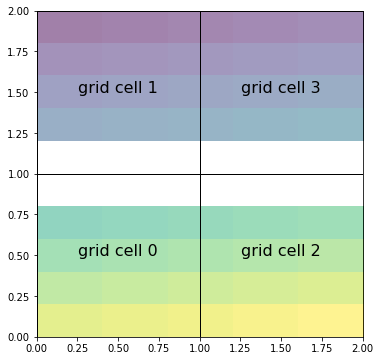

In [17]:
ax = grid.plot(color='white', figsize=(6, 6))
grid.apply(lambda x: ax.annotate(
    s=x['name'], 
    xy=x.geometry.representative_point().coords[0], 
    ha='center',
    size=16
), axis=1)

with rasterio.open(range_fp) as raster:
    img = rp.show(raster, ax=ax)

In [18]:
json_data = raster_statistics(
    grid_fp,
    'name',
    range_fp,
    compress=False
)
rs_data = json.load(open(json_data))
rs_data

{'data': [['grid cell 0',
   {'count': 10.200000762939453,
    'max': 47.0,
    'mean': 38.32352828979492,
    'min': 30.0}],
  ['grid cell 1',
   {'count': 10.199999809265137,
    'max': 17.0,
    'mean': 8.323529243469238,
    'min': 0.0}],
  ['grid cell 2',
   {'count': 10.0, 'max': 49.0, 'mean': 40.70000076293945, 'min': 32.0}],
  ['grid cell 3',
   {'count': 10.0, 'max': 19.0, 'mean': 10.699999809265137, 'min': 2.0}]],
 'metadata': {'raster': {'band': 1,
   'filename': 'range.tif',
   'path': '../tests/data/range.tif',
   'sha256': '464f093dadc5e41612a8438dd04fc7f5d219dd1699eb58dd0e1fc2b9b827a5ee'},
  'vector': {'field': 'name',
   'filename': 'grid.geojson',
   'path': '/Users/cmutel/Code/pandarus/tests/data/grid.geojson',
   'sha256': '5f261833d583cf59067d2019bde4d024093e8755aa37ae3d966cc8f4e32da7a0'},
  'when': '2017-03-22T10:21:14.421775'}}

0    Annotation(0.5,0.5,'38.3')
1     Annotation(0.5,1.5,'8.3')
2    Annotation(1.5,0.5,'40.7')
3    Annotation(1.5,1.5,'10.7')
dtype: object

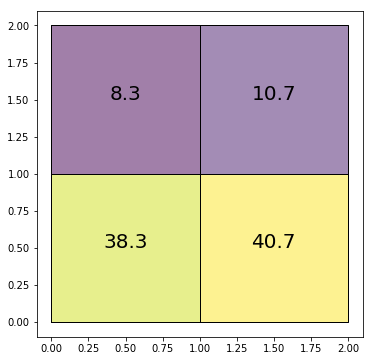

In [19]:
merged = grid.merge(pd.DataFrame([(x, y['mean']) for x, y in rs_data['data']], columns=['name', 'value']))
ax = merged.plot(column='value', figsize=(6, 6))
merged.apply(lambda x: ax.annotate(
    s="{:2.1f}".format(x['value']),
    xy=x.geometry.representative_point().coords[0], 
    ha='center',
    size=20
), axis=1)

# Getting raster statistics for lines

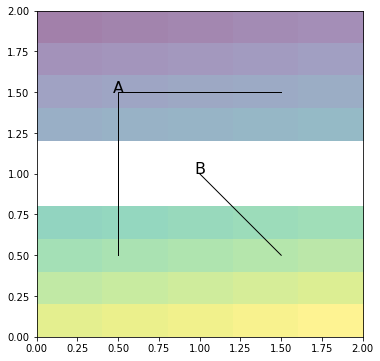

In [20]:
ax = lines.plot(color="black", figsize=(6, 6))
lines.apply(lambda x: ax.annotate(
    s=x['name'], 
    xy=x.geometry.representative_point().coords[0], 
    ha='center',
    size=16
), axis=1)

with rasterio.open(range_fp) as raster:
    img = rp.show(raster, ax=ax, alpha=0.5)

In [21]:
json_data = raster_statistics(
    lines_fp, 
    'name',
    range_fp,
    compress=False
)
rs_data = json.load(open(json_data))
rs_data

{'data': [['A',
   {'count': 0.2775000035762787,
    'max': 36.0,
    'mean': 18.450448989868164,
    'min': 11.0}],
  ['B',
   {'count': 0.07500000298023224,
    'max': 38.0,
    'mean': 34.666664123535156,
    'min': 33.0}]],
 'metadata': {'raster': {'band': 1,
   'filename': 'range.tif',
   'path': '../tests/data/range.tif',
   'sha256': '464f093dadc5e41612a8438dd04fc7f5d219dd1699eb58dd0e1fc2b9b827a5ee'},
  'vector': {'field': 'name',
   'filename': 'lines.geojson',
   'path': '/Users/cmutel/Code/pandarus/tests/data/lines.geojson',
   'sha256': '919c92894521b82139d451a37ab4daecaa5a56b9ec9526a94a1dff0f1e200e5e'},
  'when': '2017-03-22T10:21:19.532824'}}

0    Annotation(0.5,1.5,'18.5')
1        Annotation(1,1,'34.7')
dtype: object

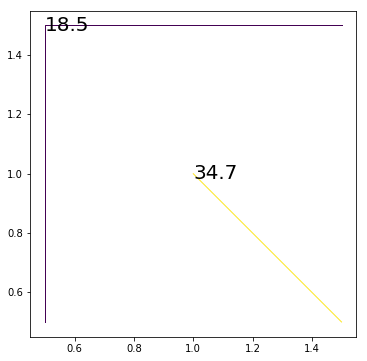

In [22]:
merged = lines.merge(pd.DataFrame([(x, y['mean']) for x, y in rs_data['data']], columns=['name', 'value']))
ax = merged.plot(column='value', figsize=(6, 6))
merged.apply(lambda x: ax.annotate(
    s="{:2.1f}".format(x['value']),
    xy=x.geometry.representative_point().coords[0], 
    va="center",
    size=20
), axis=1)

# Getting raster statistics for points

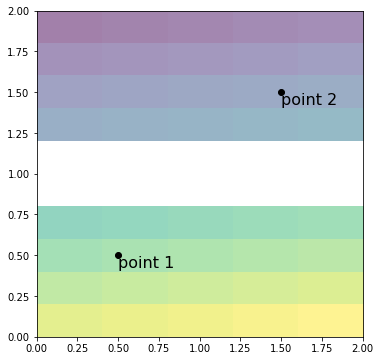

In [23]:
ax = points.plot(color="black", figsize=(6, 6), markersize=6)
points.apply(lambda x: ax.annotate(
    s=x['name'], 
    xy=x.geometry.representative_point().coords[0], 
    va='top',
    size=16
), axis=1)

with rasterio.open(range_fp) as raster:
    img = rp.show(raster, ax=ax, alpha=0.5)

In [24]:
json_data = raster_statistics(
    points_fp, 
    'name',
    range_fp,
    compress=False
)
rs_data = json.load(open(json_data))
rs_data

{'data': [['point 1', {'count': 9, 'max': 42.0, 'mean': 36.0, 'min': 30.0}],
  ['point 2', {'count': 9, 'max': 19.0, 'mean': 13.0, 'min': 7.0}]],
 'metadata': {'raster': {'band': 1,
   'filename': 'range.tif',
   'path': '../tests/data/range.tif',
   'sha256': '464f093dadc5e41612a8438dd04fc7f5d219dd1699eb58dd0e1fc2b9b827a5ee'},
  'vector': {'field': 'name',
   'filename': 'points.geojson',
   'path': '/Users/cmutel/Code/pandarus/tests/data/points.geojson',
   'sha256': '45028ae742de714be4dfb9a18308f6fe45397470553a2d203be4ca0ce45b232b'},
  'when': '2017-03-22T10:21:23.639805'}}

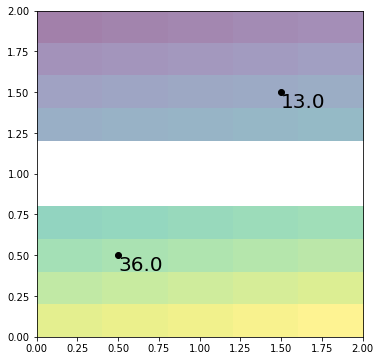

In [25]:
merged = points.merge(pd.DataFrame([(x, y['mean']) for x, y in rs_data['data']], columns=['name', 'value']))
ax = merged.plot(column='value', figsize=(6, 6), color='black', markersize=6)
merged.apply(lambda x: ax.annotate(
    s="{:2.1f}".format(x['value']),
    xy=x.geometry.representative_point().coords[0], 
    va="top",
    size=20
), axis=1)
with rasterio.open(range_fp) as raster:
    img = rp.show(raster, ax=ax, alpha=0.5)